In [1]:
import pandas as pd
pd.__version__

'1.0.1'

# 1. Load Data

In [2]:
from glob import glob
list_files = glob('D:/Works/MachineLearningProject/hubway-data/2017*.csv')

### Split the data into train and test data

In [3]:
train_list = list_files[0:11]
test_list = list_files[11]

In [4]:
train_df = pd.concat((pd.read_csv(file) for file in train_list),ignore_index=True)
train_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,1988,1
1,891,2017-01-01 00:13:16,2017-01-01 00:28:07,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,230,Subscriber,1983,1
2,1672,2017-01-01 00:16:17,2017-01-01 00:44:10,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,9,Agganis Arena - 925 Comm Ave.,42.351246,-71.115639,980,Customer,\N,0
3,747,2017-01-01 00:21:22,2017-01-01 00:33:50,46,Christian Science Plaza,42.343864,-71.085918,19,Buswell St. at Park Dr.,42.347241,-71.105301,1834,Subscriber,1968,1
4,621,2017-01-01 00:30:06,2017-01-01 00:40:28,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,8,Union Square - Brighton Ave. at Cambridge St.,42.353334,-71.137313,230,Subscriber,1983,1


In [5]:
train_df.shape

(1258702, 15)

In [6]:
test_df = pd.read_csv(test_list)
test_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,200,2017-12-01 00:02:02,2017-12-01 00:05:22,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,1938,Subscriber,1982,0
1,365,2017-12-01 00:06:14,2017-12-01 00:12:20,226,Commonwealth Ave At Babcock St,42.351547,-71.121262,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,57,Subscriber,1997,1
2,297,2017-12-01 00:09:08,2017-12-01 00:14:06,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,1201,Subscriber,1977,1
3,1128,2017-12-01 00:09:36,2017-12-01 00:28:24,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,130,Upham's Corner TEMPORARY WINTER LOCATION,42.317509,-71.064166,1148,Subscriber,1991,1
4,2594,2017-12-01 00:10:47,2017-12-01 00:54:01,193,Brookline Village - Station Street @ MBTA TEMP...,42.333765,-71.120464,32,Landmark Center - Brookline Ave at Park Dr,42.345194,-71.101697,1712,Subscriber,1963,1


In [7]:
test_df.shape

(55072, 15)

# 2. Add features to data from other sources

### 2.1 Add type of days to the data

#### Convert into datetype

In [8]:
train_df['Date'] = train_df['starttime'].apply(lambda x: x.split(" ")[0])
test_df['Date'] = test_df['starttime'].apply(lambda x: x.split(" ")[0])
train_df['starttime'] = pd.to_datetime(train_df.starttime)
test_df['starttime'] = pd.to_datetime(test_df.starttime)
train_df['stoptime'] = pd.to_datetime(train_df.stoptime)
test_df['stoptime'] = pd.to_datetime(test_df.stoptime)


In [9]:
train_df['daytype'] = train_df['starttime'].dt.day_name()
train_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Date,daytype
0,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,1988,1,2017-01-01,Sunday
1,891,2017-01-01 00:13:16,2017-01-01 00:28:07,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,230,Subscriber,1983,1,2017-01-01,Sunday
2,1672,2017-01-01 00:16:17,2017-01-01 00:44:10,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,9,Agganis Arena - 925 Comm Ave.,42.351246,-71.115639,980,Customer,\N,0,2017-01-01,Sunday
3,747,2017-01-01 00:21:22,2017-01-01 00:33:50,46,Christian Science Plaza,42.343864,-71.085918,19,Buswell St. at Park Dr.,42.347241,-71.105301,1834,Subscriber,1968,1,2017-01-01,Sunday
4,621,2017-01-01 00:30:06,2017-01-01 00:40:28,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,8,Union Square - Brighton Ave. at Cambridge St.,42.353334,-71.137313,230,Subscriber,1983,1,2017-01-01,Sunday


In [10]:
test_df['daytype'] = test_df['starttime'].dt.day_name()
test_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Date,daytype
0,200,2017-12-01 00:02:02,2017-12-01 00:05:22,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,1938,Subscriber,1982,0,2017-12-01,Friday
1,365,2017-12-01 00:06:14,2017-12-01 00:12:20,226,Commonwealth Ave At Babcock St,42.351547,-71.121262,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,57,Subscriber,1997,1,2017-12-01,Friday
2,297,2017-12-01 00:09:08,2017-12-01 00:14:06,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,1201,Subscriber,1977,1,2017-12-01,Friday
3,1128,2017-12-01 00:09:36,2017-12-01 00:28:24,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,130,Upham's Corner TEMPORARY WINTER LOCATION,42.317509,-71.064166,1148,Subscriber,1991,1,2017-12-01,Friday
4,2594,2017-12-01 00:10:47,2017-12-01 00:54:01,193,Brookline Village - Station Street @ MBTA TEMP...,42.333765,-71.120464,32,Landmark Center - Brookline Ave at Park Dr,42.345194,-71.101697,1712,Subscriber,1963,1,2017-12-01,Friday


### 2.2 Aggregate the date type into hourly base

In [11]:
train_df['hour'] = train_df.starttime.dt.hour
train_df['stoptime'] = train_df.stoptime.dt.hour
test_df['hour'] = test_df.starttime.dt.hour
test_df['stoptime'] = test_df.stoptime.dt.hour
train_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Date,daytype,hour
0,350,2017-01-01 00:06:58,0,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,1988,1,2017-01-01,Sunday,0
1,891,2017-01-01 00:13:16,0,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,230,Subscriber,1983,1,2017-01-01,Sunday,0
2,1672,2017-01-01 00:16:17,0,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,9,Agganis Arena - 925 Comm Ave.,42.351246,-71.115639,980,Customer,\N,0,2017-01-01,Sunday,0
3,747,2017-01-01 00:21:22,0,46,Christian Science Plaza,42.343864,-71.085918,19,Buswell St. at Park Dr.,42.347241,-71.105301,1834,Subscriber,1968,1,2017-01-01,Sunday,0
4,621,2017-01-01 00:30:06,0,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,8,Union Square - Brighton Ave. at Cambridge St.,42.353334,-71.137313,230,Subscriber,1983,1,2017-01-01,Sunday,0


#### Remove unnecessary columns 

In [12]:
train_df = train_df.drop(['tripduration','starttime','stoptime','start station name',
                         'end station name','birth year','usertype','gender'],
                        axis=1)
test_df = test_df.drop(['tripduration','starttime','stoptime','start station name',
                         'end station name','birth year','usertype','gender'],
                        axis=1)

#### Rearrange the columns

In [13]:
train_df = train_df[['Date','hour','start station id','start station latitude','start station longitude','end station id','end station latitude','end station longitude','bikeid','daytype']]
test_df = test_df[['Date','hour','start station id','start station latitude','start station longitude','end station id','end station latitude','end station longitude','bikeid','daytype']]

In [14]:
train_df.head()

,Date,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype
0,2017-01-01,0,67,42.358100,-71.093198,139,42.361780,-71.108100,644,Sunday
1,2017-01-01,0,36,42.349673,-71.077303,10,42.350406,-71.108279,230,Sunday
2,2017-01-01,0,36,42.349673,-71.077303,9,42.351246,-71.115639,980,Sunday
3,2017-01-01,0,46,42.343864,-71.085918,19,42.347241,-71.105301,1834,Sunday
4,2017-01-01,0,10,42.350406,-71.108279,8,42.353334,-71.137313,230,Sunday


In [15]:
test_df.head()

,Date,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype
0,2017-12-01,0,160,42.337586,-71.096271,12,42.336244,-71.087986,1938,Friday
1,2017-12-01,0,226,42.351547,-71.121262,10,42.350406,-71.108279,57,Friday
2,2017-12-01,0,74,42.373268,-71.118579,76,42.366426,-71.105495,1201,Friday
3,2017-12-01,0,46,42.343666,-71.085824,130,42.317509,-71.064166,1148,Friday
4,2017-12-01,0,193,42.333765,-71.120464,32,42.345194,-71.101697,1712,Friday


### 2.3 Add weather data(temperature)

#### Format the dataframe

In [16]:
# weather_df = pd.read_csv(r"D:\Works\MachineLearningProject\hubway-data\weather-history.csv",names=["Origin","Date","Hour", "Temperature"])
weather_df = pd.read_csv(r"D:\Works\MachineLearningProject\hubway-data\weather-history.csv",names=["Origin","Date","Hour", "Temperature"])

weather_df['Date'] = weather_df['Origin'].apply(lambda x: "-".join(x.split(";")[0:3]))
weather_df['Hour'] = weather_df['Origin'].apply(lambda x: x.split(";")[3])
weather_df['Temperature'] = weather_df['Origin'].apply(lambda x: x.split(";")[5])
weather_df['Rain'] = weather_df['Origin'].apply(lambda x: x.split(";")[6])

weather_df = weather_df.drop(['Origin'],axis='columns')
weather_df.head()

,Date,Hour,Temperature,Rain
0,2017-01-01,00,38.10,0.00
1,2017-01-01,01,38.08,0.00
2,2017-01-01,02,38.10,0.00
3,2017-01-01,03,38.21,0.00
4,2017-01-01,04,37.36,0.00


In [17]:
weather_df.dtypes

Date           object
Hour           object
Temperature    object
Rain           object
dtype: object

#### Convert weather data frame into date, number type

In [18]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df['Hour'] = pd.to_numeric(weather_df.Hour,errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df.Temperature,errors='coerce')
weather_df['Rain'] = pd.to_numeric(weather_df.Rain,errors='coerce')
weather_df.dtypes

Date           datetime64[ns]
Hour                    int64
Temperature           float64
Rain                  float64
dtype: object

#### Join weather dataframe with train_df,test_df

In [19]:
weather_df.head()

,Date,Hour,Temperature,Rain
0,2017-01-01,0,38.10,0.0
1,2017-01-01,1,38.08,0.0
2,2017-01-01,2,38.10,0.0
3,2017-01-01,3,38.21,0.0
4,2017-01-01,4,37.36,0.0


In [20]:
DateHour = train_df['Date'].astype(str)+":"+train_df['hour'].astype(str)
train_df['same_id'] = DateHour
train_df.head()

,Date,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype,same_id
0,2017-01-01,0,67,42.358100,-71.093198,139,42.361780,-71.108100,644,Sunday,2017-01-01:0
1,2017-01-01,0,36,42.349673,-71.077303,10,42.350406,-71.108279,230,Sunday,2017-01-01:0
2,2017-01-01,0,36,42.349673,-71.077303,9,42.351246,-71.115639,980,Sunday,2017-01-01:0
3,2017-01-01,0,46,42.343864,-71.085918,19,42.347241,-71.105301,1834,Sunday,2017-01-01:0
4,2017-01-01,0,10,42.350406,-71.108279,8,42.353334,-71.137313,230,Sunday,2017-01-01:0


In [21]:
DateHour = test_df['Date'].astype(str)+":"+test_df['hour'].astype(str)
test_df['same_id'] = DateHour
test_df.head()

,Date,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype,same_id
0,2017-12-01,0,160,42.337586,-71.096271,12,42.336244,-71.087986,1938,Friday,2017-12-01:0
1,2017-12-01,0,226,42.351547,-71.121262,10,42.350406,-71.108279,57,Friday,2017-12-01:0
2,2017-12-01,0,74,42.373268,-71.118579,76,42.366426,-71.105495,1201,Friday,2017-12-01:0
3,2017-12-01,0,46,42.343666,-71.085824,130,42.317509,-71.064166,1148,Friday,2017-12-01:0
4,2017-12-01,0,193,42.333765,-71.120464,32,42.345194,-71.101697,1712,Friday,2017-12-01:0


In [22]:
DateHour = weather_df['Date'].astype(str)+":"+weather_df['Hour'].astype(str)
weather_df['same_id'] = DateHour
weather_df.head()

,Date,Hour,Temperature,Rain,same_id
0,2017-01-01,0,38.10,0.0,2017-01-01:0
1,2017-01-01,1,38.08,0.0,2017-01-01:1
2,2017-01-01,2,38.10,0.0,2017-01-01:2
3,2017-01-01,3,38.21,0.0,2017-01-01:3
4,2017-01-01,4,37.36,0.0,2017-01-01:4


#### Split the weather dataframe into train and test

In [23]:
time = pd.to_datetime('12/1/2017')
weather_train = weather_df.loc[weather_df.Date<time,:]
weather_train.tail()

,Date,Hour,Temperature,Rain,same_id
8011,2017-11-30,19,35.69,0.5,2017-11-30:19
8012,2017-11-30,20,35.13,0.4,2017-11-30:20
8013,2017-11-30,21,34.54,0.3,2017-11-30:21
8014,2017-11-30,22,34.21,0.3,2017-11-30:22
8015,2017-11-30,23,33.87,0.2,2017-11-30:23


In [24]:
weather_test = weather_df.loc[weather_df.Date>=time,:]
weather_test.head()

,Date,Hour,Temperature,Rain,same_id
8016,2017-12-01,0,32.86,0.2,2017-12-01:0
8017,2017-12-01,1,30.88,0.2,2017-12-01:1
8018,2017-12-01,2,31.06,0.1,2017-12-01:2
8019,2017-12-01,3,30.36,0.2,2017-12-01:3
8020,2017-12-01,4,29.28,0.1,2017-12-01:4


In [25]:
train_merge = pd.merge(left=train_df, right=weather_train,left_on='same_id', right_on='same_id')
train_merge = train_merge.drop(['Date_y','same_id','Hour'],axis=1)
train_merge.head()

,Date_x,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype,Temperature,Rain
0,2017-01-01,0,67,42.358100,-71.093198,139,42.361780,-71.108100,644,Sunday,38.1,0.0
1,2017-01-01,0,36,42.349673,-71.077303,10,42.350406,-71.108279,230,Sunday,38.1,0.0
2,2017-01-01,0,36,42.349673,-71.077303,9,42.351246,-71.115639,980,Sunday,38.1,0.0
3,2017-01-01,0,46,42.343864,-71.085918,19,42.347241,-71.105301,1834,Sunday,38.1,0.0
4,2017-01-01,0,10,42.350406,-71.108279,8,42.353334,-71.137313,230,Sunday,38.1,0.0


In [26]:
test_merge = pd.merge(left=test_df, right=weather_test,left_on='same_id', right_on='same_id')
test_merge = test_merge.drop(['Date_y','same_id','Hour'],axis=1)
test_merge.head()

,Date_x,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype,Temperature,Rain
0,2017-12-01,0,160,42.337586,-71.096271,12,42.336244,-71.087986,1938,Friday,32.86,0.2
1,2017-12-01,0,226,42.351547,-71.121262,10,42.350406,-71.108279,57,Friday,32.86,0.2
2,2017-12-01,0,74,42.373268,-71.118579,76,42.366426,-71.105495,1201,Friday,32.86,0.2
3,2017-12-01,0,46,42.343666,-71.085824,130,42.317509,-71.064166,1148,Friday,32.86,0.2
4,2017-12-01,0,193,42.333765,-71.120464,32,42.345194,-71.101697,1712,Friday,32.86,0.2


### Split the Date into Month and Day

In [27]:
train_merge.columns

Index(['Date_x', 'hour', 'start station id', 'start station latitude',
       'start station longitude', 'end station id', 'end station latitude',
       'end station longitude', 'bikeid', 'daytype', 'Temperature', 'Rain'],
      dtype='object')

In [28]:
train_merge['month'] = train_merge['Date_x'].apply(lambda x: x.split("-")[1])
train_merge['day'] = train_merge['Date_x'].apply(lambda x: x.split("-")[2])
train_merge = train_merge.drop(['Date_x'],axis=1)
train_merge = train_merge[['month','day','hour','start station id','start station latitude','start station longitude','end station id','end station latitude','end station longitude','bikeid','daytype','Temperature','Rain']]


In [29]:
test_merge['month'] = test_merge['Date_x'].apply(lambda x: x.split("-")[1])
test_merge['day'] = test_merge['Date_x'].apply(lambda x: x.split("-")[2])
test_merge = test_merge.drop(['Date_x'],axis=1)
test_merge = test_merge[['month','day','hour','start station id','start station latitude','start station longitude','end station id','end station latitude','end station longitude','bikeid','daytype','Temperature','Rain']]


In [30]:
train_merge.head()

,month,day,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype,Temperature,Rain
0,01,01,0,67,42.358100,-71.093198,139,42.361780,-71.108100,644,Sunday,38.1,0.0
1,01,01,0,36,42.349673,-71.077303,10,42.350406,-71.108279,230,Sunday,38.1,0.0
2,01,01,0,36,42.349673,-71.077303,9,42.351246,-71.115639,980,Sunday,38.1,0.0
3,01,01,0,46,42.343864,-71.085918,19,42.347241,-71.105301,1834,Sunday,38.1,0.0
4,01,01,0,10,42.350406,-71.108279,8,42.353334,-71.137313,230,Sunday,38.1,0.0


In [31]:
train_merge = train_merge[['month','day','hour','start station id','start station latitude','start station longitude','end station id','end station latitude','end station longitude','bikeid','daytype','Temperature','Rain']]


In [32]:
test_merge = test_merge[['month','day','hour','start station id','start station latitude','start station longitude','end station id','end station latitude','end station longitude','bikeid','daytype','Temperature','Rain']]


#### You can add more features.

# 3. Data Visualization

### 3.1 Visualize by month

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
month_df = train_merge.groupby('month').agg({'bikeid':['count','mean']})
month_df.columns = ['count','mean']
month_df = month_df.reset_index()
month_df

,month,count,mean
0,01,19518,1032.605082
1,02,17272,1070.046955
2,03,31253,1071.067290
3,04,99860,1051.592800
4,05,127894,1028.837733
5,06,161910,984.843654
6,07,175833,991.027964
7,08,190651,982.831236
8,09,165386,931.057278
9,10,163662,942.822366


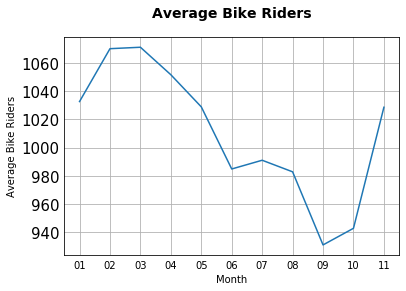

In [35]:
plt.plot(month_df['month'],month_df['mean'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Average Bike Riders')
plt.xlabel('Month')
plt.title('Average Bike Riders', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### 3.2 Visualize by day

In [36]:
day_df = train_merge.groupby('day').agg({'bikeid':['count','mean']})
day_df.columns = ['count','mean']
day_df = day_df.reset_index()
day_df.head()

,day,count,mean
0,01,40159,992.207052
1,02,40149,984.773319
2,03,40117,994.390533
3,04,40830,984.316850
4,05,36296,988.580808


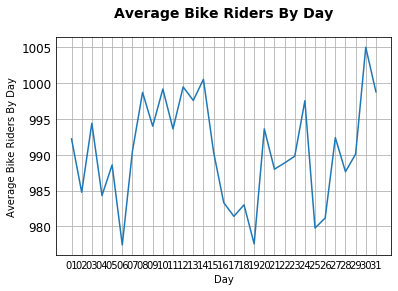

In [37]:
plt.plot(day_df['day'],day_df['mean'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=12)
plt.ylabel('Average Bike Riders By Day')
plt.xlabel('Day')
plt.title('Average Bike Riders By Day', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### 3.3 Visualize by day of week

In [38]:
week_df = train_merge.groupby('daytype').agg({'bikeid':['count','mean']})
week_df.columns = ['count','mean']
week_df = week_df.reset_index()
week_df = week_df.reindex([1,5,6,4,0,2,3])
week_df

,daytype,count,mean
1,Monday,180888,986.071967
5,Tuesday,194004,990.176532
6,Wednesday,199459,990.266030
4,Thursday,202683,991.296813
0,Friday,185360,992.607073
2,Saturday,149114,991.843482
3,Sunday,147194,990.302641


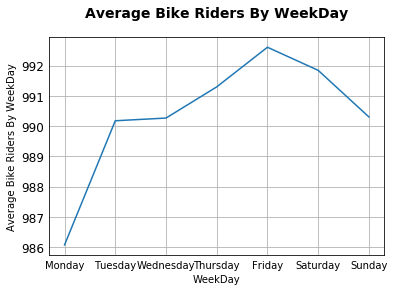

In [39]:
plt.plot(week_df['daytype'],week_df['mean'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=12)
plt.ylabel('Average Bike Riders By WeekDay')
plt.xlabel('WeekDay')
plt.title('Average Bike Riders By WeekDay', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### 3.3 Visualize by weather condition

In [40]:
rain_df= train_merge.groupby('Rain').agg({'bikeid':['count','mean']})
rain_df.columns = ['count','mean']
rain_df = rain_df.reset_index()
rain_df.head()

,Rain,count,mean
0,0.0,1029639,988.592216
1,0.1,51039,1004.808872
2,0.2,39903,1007.160990
3,0.3,29245,997.534963
4,0.4,21234,996.566874


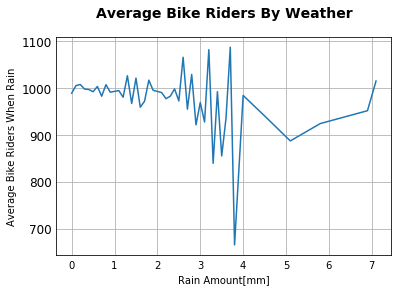

In [41]:
plt.plot(rain_df['Rain'],rain_df['mean'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=12)
plt.ylabel('Average Bike Riders When Rain')
plt.xlabel('Rain Amount[mm]')
plt.title('Average Bike Riders By Weather', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

In [42]:
temp_df= train_merge.groupby('Temperature').agg({'bikeid':['count','mean']})
temp_df.columns = ['count','mean']
temp_df = temp_df.reset_index()
temp_df.head()

,Temperature,count,mean
0,20.70,2,985.000000
1,20.93,5,918.400000
2,21.09,1,275.000000
3,21.49,9,1074.111111
4,21.65,2,871.500000


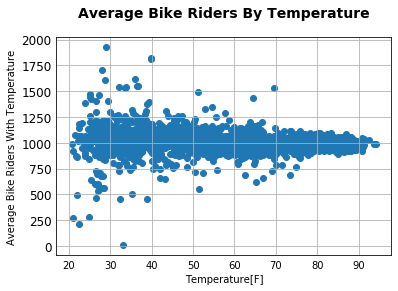

In [43]:
plt.scatter(temp_df['Temperature'],temp_df['mean'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=12)
plt.ylabel('Average Bike Riders With Temperature')
plt.xlabel('Temperature[F]')
plt.title('Average Bike Riders By Temperature', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### 3.4 Visualize in every station

##### 3.4.1 Visualize every station hourly

In [44]:
start_df= train_merge.groupby(['start station id','hour']).agg({'bikeid':['count','mean']})
start_df.columns = ['count','mean']
start_df = start_df.reset_index()
start_hour = start_df.groupby('start station id').agg({'mean':'mean'})
start_hour.columns = ['hour_mean']
start_hour = start_hour.reset_index()
start_hour.head()

,start station id,hour_mean
0,1,1274.463418
1,3,961.484384
2,4,1014.456637
3,5,974.320679
4,6,980.116847


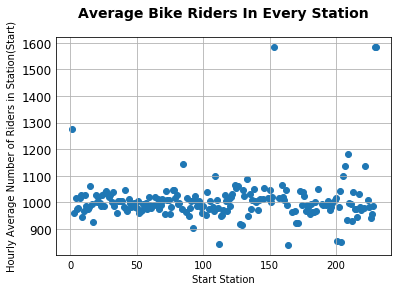

In [45]:
plt.scatter(start_hour['start station id'],start_hour['hour_mean'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=12)
plt.ylabel('Hourly Average Number of Riders in Station(Start)')
plt.xlabel('Start Station')
plt.title('Average Bike Riders In Every Station', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

In [46]:
end_df= train_merge.groupby(['end station id','hour']).agg({'bikeid':['count','mean']})
end_df.columns = ['count','mean']
end_df = end_df.reset_index()
end_hour = end_df.groupby('end station id').agg({'mean':'mean'})
end_hour.columns = ['hour_mean']
end_hour = end_hour.reset_index()
end_hour.head()

,end station id,hour_mean
0,1,965.250409
1,3,967.255630
2,4,987.931184
3,5,994.867809
4,6,986.194079


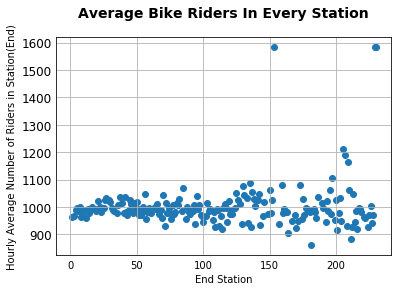

In [47]:
plt.scatter(end_hour['end station id'],end_hour['hour_mean'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=12)
plt.ylabel('Hourly Average Number of Riders in Station(End)')
plt.xlabel('End Station')
plt.title('Average Bike Riders In Every Station', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

# 4. Data Preprocess

In [48]:
train_merge.tail()

,month,day,hour,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,daytype,Temperature,Rain
1258697,11,30,23,100,42.396969,-71.123024,114,42.402763,-71.126908,706,Thursday,33.87,0.2
1258698,11,30,23,95,42.372969,-71.094445,88,42.374035,-71.101427,980,Thursday,33.87,0.2
1258699,11,30,23,25,42.341332,-71.076847,91,42.366277,-71.091690,1376,Thursday,33.87,0.2
1258700,11,30,23,33,42.348706,-71.097009,33,42.348706,-71.097009,1312,Thursday,33.87,0.2
1258701,11,30,23,68,42.365070,-71.103100,184,42.357753,-71.103934,1325,Thursday,33.87,0.2


In [49]:
train_start = train_merge.groupby(['start station id','start station latitude','start station longitude','month','day','daytype','hour','Rain','Temperature',]).agg({'bikeid':'mean'})
train_start.columns = ['numofriders']
train_start = train_start.reset_index()
train_start.tail(15)

,start station id,start station latitude,start station longitude,month,day,daytype,hour,Rain,Temperature,numofriders
452844,228,42.361619,-71.080436,11,29,Wednesday,21,0.0,35.20,828.0
452845,228,42.361619,-71.080436,11,30,Thursday,10,0.6,36.32,1935.0
452846,228,42.361619,-71.080436,11,30,Thursday,11,0.5,38.16,1278.0
452847,228,42.361619,-71.080436,11,30,Thursday,15,0.2,39.15,1107.5
452848,228,42.361619,-71.080436,11,30,Thursday,16,0.2,37.31,1266.5
452849,228,42.361619,-71.080436,11,30,Thursday,17,0.3,36.05,1126.5
452850,228,42.361619,-71.080436,11,30,Thursday,19,0.5,35.69,1139.0
452851,228,42.361619,-71.080436,11,30,Thursday,20,0.4,35.13,1851.0
452852,228,42.361619,-71.080436,11,30,Thursday,22,0.3,34.21,542.5
452853,229,0.000000,0.000000,09,08,Friday,13,0.0,68.77,1583.0


In [50]:
test_start = test_merge.groupby(['start station id','start station latitude','start station longitude','month','day','daytype','hour','Rain','Temperature',]).agg({'bikeid':'mean'})
test_start.columns = ['numofriders']
test_start = test_start.reset_index()
test_merge.dtypes

month                       object
day                         object
hour                         int64
start station id             int64
start station latitude     float64
start station longitude    float64
end station id               int64
end station latitude       float64
end station longitude      float64
bikeid                       int64
daytype                     object
Temperature                float64
Rain                       float64
dtype: object

#### It seems like we don't need daytype row because once we get to know the date, the daytype can be defined.

In [51]:
train_start = train_start.drop(['daytype'],axis=1)

In [52]:
test_start = test_start.drop(['daytype'],axis=1)

In [53]:
train_start['month'] = pd.to_numeric(train_start.month,errors='coerce')
train_start['day'] = pd.to_numeric(train_start.day,errors='coerce')
train_start.dtypes
# train_start.isna().sum()

start station id             int64
start station latitude     float64
start station longitude    float64
month                        int64
day                          int64
hour                         int64
Rain                       float64
Temperature                float64
numofriders                float64
dtype: object

In [54]:
test_start['month'] = pd.to_numeric(test_start.month,errors='coerce')
test_start['day'] = pd.to_numeric(test_start.day,errors='coerce')
test_start.dtypes

start station id             int64
start station latitude     float64
start station longitude    float64
month                        int64
day                          int64
hour                         int64
Rain                       float64
Temperature                float64
numofriders                float64
dtype: object

In [55]:
train_end = train_merge.groupby(['end station id','end station latitude','end station longitude','month','day','daytype','hour','Rain','Temperature',]).agg({'bikeid':'mean'})
train_end.columns = ['numofriders']
train_end = train_end.reset_index()
train_end = train_end.drop(['daytype'],axis=1)
train_end

,end station id,end station latitude,end station longitude,month,day,hour,Rain,Temperature,numofriders
0,1,42.387151,-71.075978,01,05,10,0.0,31.21,576.0
1,1,42.387151,-71.075978,01,06,17,0.0,27.77,1088.0
2,1,42.387151,-71.075978,01,11,9,0.0,30.76,1380.0
3,1,42.387151,-71.075978,01,13,11,0.1,35.20,1104.0
4,1,42.387151,-71.075978,01,22,7,0.0,28.94,1096.0
...,...,...,...,...,...,...,...,...,...
450546,229,0.000000,0.000000,10,05,11,0.0,64.87,1583.0
450547,229,0.000000,0.000000,10,11,13,0.0,66.09,1583.0
450548,229,0.000000,0.000000,10,20,10,0.0,63.99,1583.0
450549,230,0.000000,0.000000,09,12,15,0.0,61.47,1583.0


In [56]:
corr_matrix = train_start.corr()
abs(corr_matrix["numofriders"]).sort_values(ascending=False)

numofriders                1.000000
month                      0.059344
Temperature                0.028466
start station id           0.005639
hour                       0.005218
start station latitude     0.003810
start station longitude    0.003491
day                        0.001264
Rain                       0.000032
Name: numofriders, dtype: float64

In [57]:
#Removing outliers
latitude = train_start['start station latitude']>0 
latitude_less = train_start['start station latitude']<43 
longitude = train_start['start station longitude']<0
train_start = train_start[latitude&longitude&latitude_less]
train_start.tail()

,start station id,start station latitude,start station longitude,month,day,hour,Rain,Temperature,numofriders
452848,228,42.361619,-71.080436,11,30,16,0.2,37.31,1266.5
452849,228,42.361619,-71.080436,11,30,17,0.3,36.05,1126.5
452850,228,42.361619,-71.080436,11,30,19,0.5,35.69,1139.0
452851,228,42.361619,-71.080436,11,30,20,0.4,35.13,1851.0
452852,228,42.361619,-71.080436,11,30,22,0.3,34.21,542.5


In [58]:
latitude = test_start['start station latitude']>0 
latitude_less = test_start['start station latitude']<43 
longitude = test_start['start station longitude']<0
test_start = test_start[latitude&longitude&latitude_less]
test_start.tail()

,start station id,start station latitude,start station longitude,month,day,hour,Rain,Temperature,numofriders
27051,228,42.361619,-71.080436,12,29,17,0.0,35.83,1848.0
27052,232,42.304128,-71.079295,12,19,11,0.0,35.08,894.0
27053,232,42.304128,-71.079295,12,22,9,0.3,43.30,1061.0
27054,232,42.304128,-71.079295,12,22,20,0.0,42.62,249.0
27055,232,42.304128,-71.079295,12,23,1,0.0,40.66,59.0


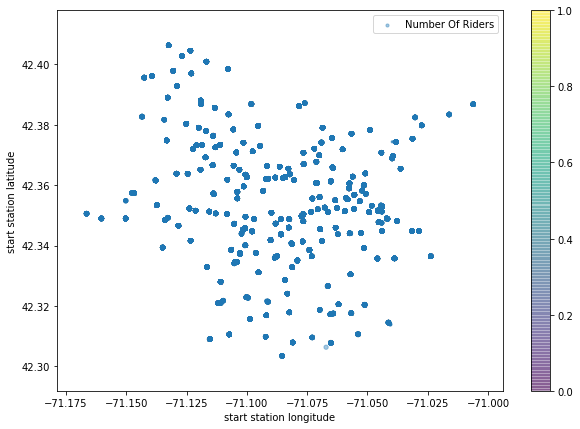

In [59]:
train_start.plot(kind="scatter", x="start station longitude", y="start station latitude", alpha=0.4,
    s=train_start["numofriders"]/100, label="Number Of Riders", figsize=(10,7),
    cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

# 4.Apply Supervised Learning Algorithm

## Apply SVM Regression

In [60]:
train_feature = train_start.drop(['numofriders'],axis=1)
train_label = train_start['numofriders'].copy()

In [61]:
test_feature = test_start.drop(['numofriders'],axis=1)
test_label = test_start['numofriders'].copy()

In [62]:
train_feature.head()

,start station id,start station latitude,start station longitude,month,day,hour,Rain,Temperature
0,1,42.387151,-71.075978,3,9,17,1.1,51.30
1,1,42.387151,-71.075978,3,21,14,0.0,52.88
2,1,42.387151,-71.075978,3,21,17,0.0,50.97
3,1,42.387151,-71.075978,3,27,17,0.0,63.32
4,1,42.387151,-71.075978,3,28,17,0.0,62.87


In [63]:
train_label.head()

0    1532.0
1    1798.0
2    1732.0
3    1385.0
4     637.0
Name: numofriders, dtype: float64

In [64]:
y = train_label
y_test = test_label

#### Now let's build a pipeline for preprocessing the numerical attributes:

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
train_feauture_tr = num_pipeline.fit_transform(train_feature)
X = train_feauture_tr

In [66]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=100, gamma=0.1, epsilon=.1,max_iter=100)
svr_rbf.fit(X,y)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=100, shrinking=True, tol=0.001, verbose=False)

In [67]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
test_feature = num_pipeline.fit_transform(test_feature)

In [68]:
X_test = test_feature
rbf_predicted = svr_rbf.predict(X_test)
rbf_predicted

array([986.29294904, 988.37274453, 957.06112222, ..., 986.0608424 ,
       993.47120942, 984.1305278 ])

In [69]:
y_test

0        1023.0
1         651.0
2         649.0
3        1335.0
4        1924.0
          ...  
27051    1848.0
27052     894.0
27053    1061.0
27054     249.0
27055      59.0
Name: numofriders, Length: 27056, dtype: float64

In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_rbf = mean_squared_error(y_test,rbf_predicted)
rmse_rbf = np.sqrt(mse_rbf )
rmse_rbf

525.0955276961117

In [71]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto',max_iter=100)
svr_lin.fit(X,y)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=100, shrinking=True, tol=0.001, verbose=False)

In [72]:
lin_predicted = svr_lin.predict(X_test)
lin_predicted

array([700.2142458 , 413.36636643, 313.70172531, ..., 477.19173678,
       462.60102862, 402.21820706])

In [73]:
mse_lin = mean_squared_error(y_test, lin_predicted)
rmse_lin = np.sqrt(mse_lin)
rmse_lin

830.8692685426705

In [78]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=2, epsilon=.1,
               coef0=1,max_iter=100)
svr_poly.fit(X,y)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=1, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=100, shrinking=True, tol=0.001, verbose=False)

In [79]:
pol_predicted = svr_poly.predict(X_test)
pol_predicted

array([ -9277.02320814, -10051.79761581, -10006.45736445, ...,
        -9940.87536587,  -9950.31785456,  -9812.17477572])

In [80]:
mse_pol = mean_squared_error(y_test, pol_predicted)
rmse_pol = np.sqrt(mse_pol)
rmse_pol

11070.298650474246

### Compare the algorithms

In [86]:
svr_rbf.score(X_test,y_test)

-0.02882054394382849

In [87]:
svr_poly.score(X_test,y_test)

-456.27942780260366

In [88]:
svr_lin.score(X_test,y_test)

-1.5758963342347623

### As you can see, we should use rbf as kernel but still it is not good enough

### How can we improve the results(We should set the hyperparameters more reasonably)

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

scorer = make_scorer(mean_squared_error, greater_is_better=False)
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000],'max_iter':[10,100,1000]}]

svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K,scoring=scorer)
svr.fit(X, y)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\sv

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.01, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf'], 'max_iter': [10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

In [93]:
cv_res = svr.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)
    

451.50825316662707 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 10}
451.75908647401627 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 100}
452.2902951998174 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 1000}
451.50833139583267 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 10}
451.75978243731817 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100}
452.29302173672926 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 1000}
451.5089937732419 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 10}
451.7644915671308 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100}
452.31340131533926 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 1000}
451.512298459085 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 10}
451.76802395562055 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100}
452.3474336094792 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1000}
451.51171826972325 {'C': 1, 'gamma': 0.2, 'kernel': 'rbf', 'max_iter': 10}
4

## The best hyperparameter for SVR are as followings

In [95]:
svr.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 10}